In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### We would first find the meaning of each attribute.

### Numeric Attributes:

<li>age: Age in years</li>
<li>trestbps: Resting Blood Pressure, individual values displayed in mmHg unit.</li>
<li>chol: Serum cholesterol value displayed in mg/dl.</li>
<li>thalach: Maximum heart rate achieved.</li>
<li>oldpeak: ST depression induced by exercise related to rest.</li>

### Categorical attributes:

<li>sex: Displays the gender (Male(1), Female(0)).</li>
<li>cp: Chest pain type (Typical Angina(0), Atypical Angina(1), Non-angina pain(2), asymptomatic(3)).</li>
<li>fbs: Fasting blood sugar, given as a comparison. If value > 120 mg/dl then true(1) else false(0).</li>
<li>restecg: Resting electrocardiographic result (Normal(0), ST-T wave abnormality(1), Left ventricular hypertrophy (2)).</li>
<li>exang: Exercise include angina (No(0), Yes(1)).</li>
<li>slope: Slope of the peak exercise ST segment (Upsloping(0), Flat(1), Downsloping(2)).</li>
<li>thal: Displays the thalassemia (Unknown(0), Normal(1), Fixed defect(2), Reversible defect(3)).</li>
<li>ca: Number of major vessels colored by fluoroscopy.(Numbers 0, 1, 2, 3, 4).</li>

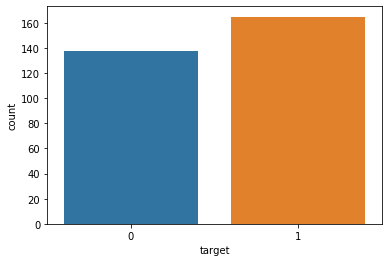

In [5]:
sns.countplot(x='target', data=df)

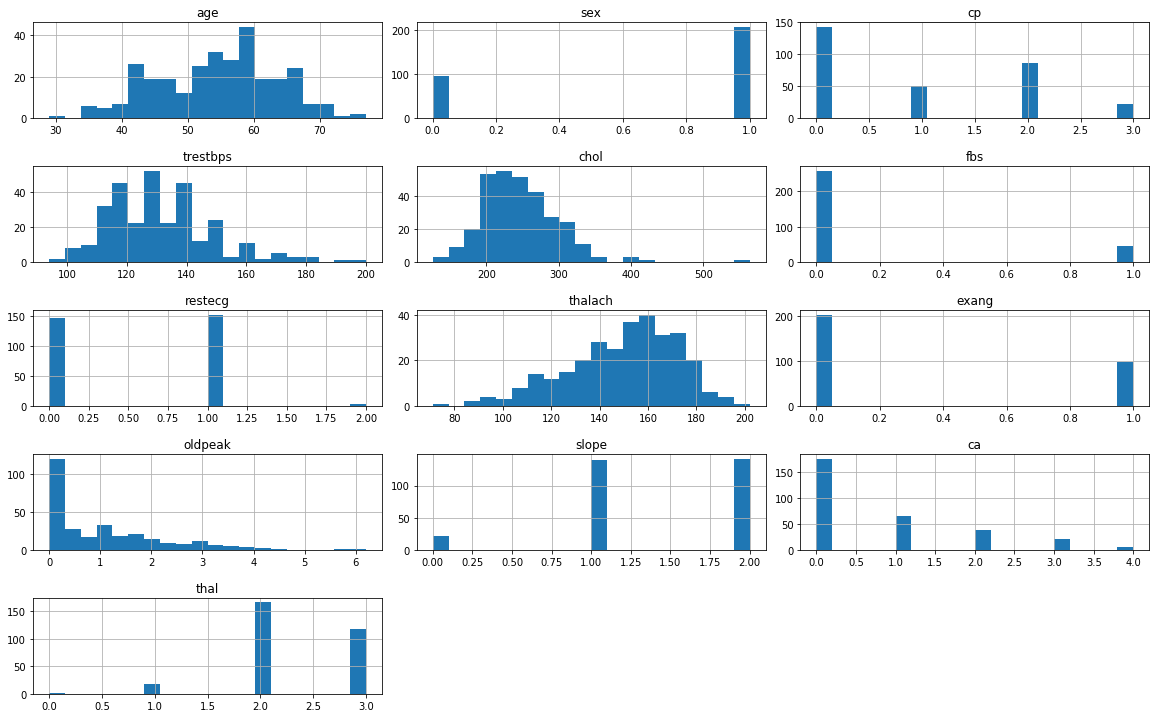

In [6]:
import itertools
col = df.columns[:13]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

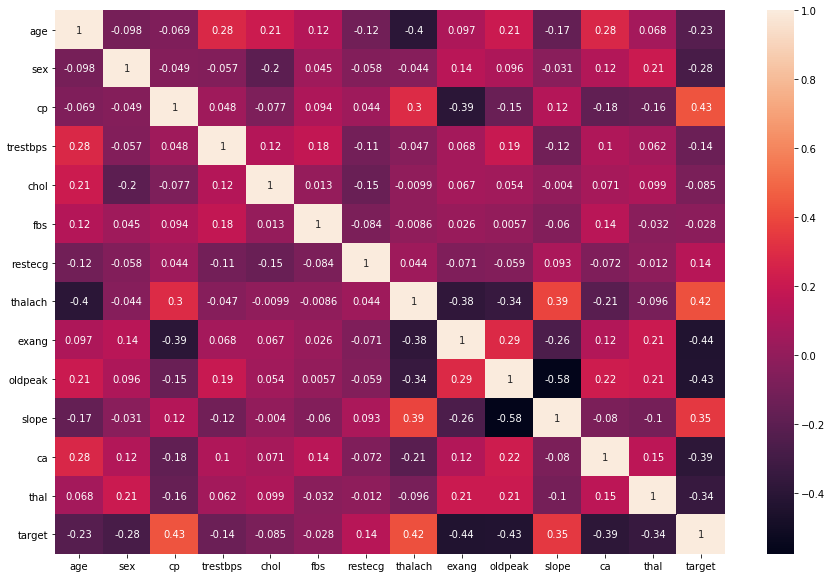

In [7]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

In [8]:
numeric_cols=['age','trestbps','chol','thalach','oldpeak']#numeric attributes
cat_cols=['sex','cp','fbs','restecg','exang','slope','ca','thal']#categorical attributes
df[cat_cols].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64

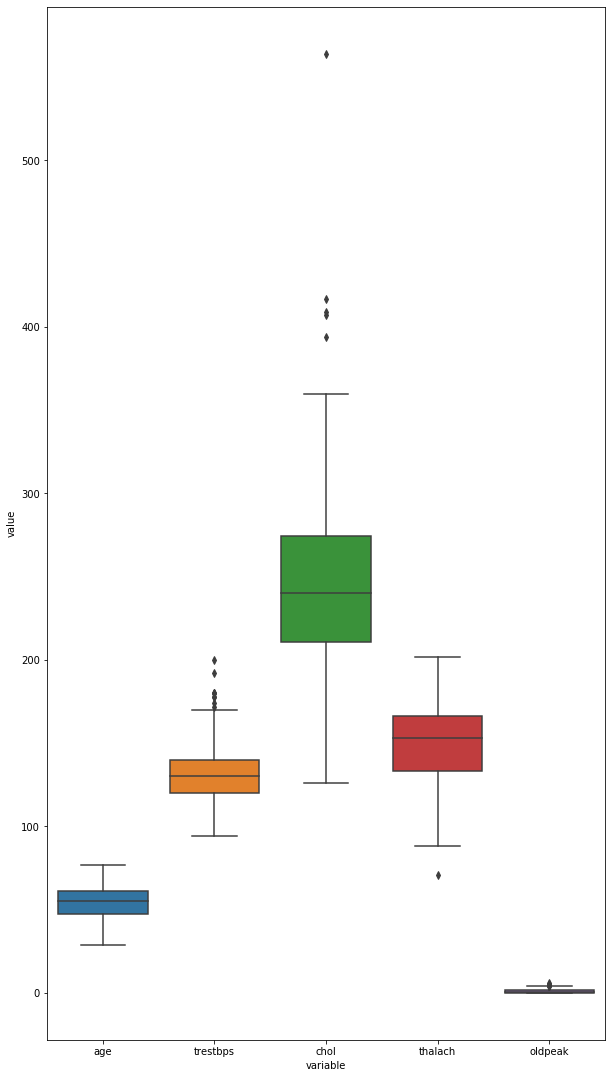

In [9]:
#lets go for box plots of numeric attributes.
plt.figure(figsize=(10,19))
sns.boxplot(x="variable", y="value", data=pd.melt(df[numeric_cols]))
plt.show()

In [10]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [11]:
df_outliers= df[(z >= 3).any(axis=1)]
df_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [12]:
df_clean=df[(z <3.5).all(axis=1)] # pay attention to the condition.
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
duplicate = df_clean[df_clean.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
df_clean.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
y=df_clean['target']
x=df_clean.drop(columns=['target', 'ca', 'fbs'])

In [16]:
x.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,3,145,233,0,150,0,2.3,0,1
1,37,1,2,130,250,1,187,0,3.5,0,2
2,41,0,1,130,204,0,172,0,1.4,2,2
3,56,1,1,120,236,1,178,0,0.8,2,2
4,57,0,0,120,354,1,163,1,0.6,2,2


In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()

In [21]:
classifiers = [('Decision Tree Classifier', dc),
              ('Random Forest Classifier', rc),
              ('KNeighbors Classifier', knnc),
             ('Ada Boost Classifier', abc),
             ('Gradient Boosting Classifier', gbc)]

In [22]:
for reg_name, reg in classifiers:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = y_pred.reshape(-1,1)
    print(reg_name, accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.64
Random Forest Classifier 0.76
KNeighbors Classifier 0.7333333333333333
Ada Boost Classifier 0.7333333333333333
Gradient Boosting Classifier 0.7733333333333333


In [23]:
import pickle

In [24]:
heart_model = "heart_model.pkl"  
with open(heart_model, 'wb') as file:  
    pickle.dump(gbc, file)